In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load data

In [2]:
train=pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/Experiments_Meltemi/train_dev_test_dataset/final_data/train_gr.csv')
dev=pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/Experiments_Meltemi/train_dev_test_dataset/final_data/dev_human_gr.csv')
test=pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/Experiments_Meltemi/train_dev_test_dataset/final_data/test_human_gr.csv')


In [3]:
concatenated_df = pd.concat([train, dev, test])
concatenated_df

,Unnamed: 0,arg_id,key_point_id,label,arg,key_point,topic,stance
0,0,arg_0_0,kp_0_0,0,Οι άνθρωποι φτάνουν στο όριο της ποιότητας ζωή...,Η υποβοηθούμενη αυτοκτονία δίνει αξιοπρέπεια σ...,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ...,-1
1,1,arg_0_1,kp_0_0,0,Ένας ασθενής θα πρέπει να είναι σε θέση να απο...,Η υποβοηθούμενη αυτοκτονία δίνει αξιοπρέπεια σ...,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ...,-1
2,2,arg_0_1,kp_0_1,0,Ένας ασθενής θα πρέπει να είναι σε θέση να απο...,Η υποβοηθούμενη αυτοκτονία μειώνει τον πόνο,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ...,-1
3,3,arg_0_1,kp_0_2,1,Ένας ασθενής θα πρέπει να είναι σε θέση να απο...,Οι άνθρωποι θα πρέπει να έχουν την ελευθερία ν...,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ...,-1
4,4,arg_0_2,kp_0_0,0,Ένα άτομο έχει το δικαίωμα να θέσει τέλος στον...,Η υποβοηθούμενη αυτοκτονία δίνει αξιοπρέπεια σ...,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ...,-1
...,...,...,...,...,...,...,...,...
3421,3421,arg_2_209,kp_2_9,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν υπέροχο περιβάλλον...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3422,3422,arg_2_209,kp_2_13,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν σπουδαίο λαό/πολιτ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3423,3423,arg_2_209,kp_2_10,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες είναι μια ισχυρή χώρα,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1
3424,3424,arg_2_209,kp_2_11,0,"ναι, είναι μια καλή χώρα, γιατί έχει καλή εκπα...",Οι Ηνωμένες Πολιτείες έχουν ισχυρή οικονομία/υ...,Οι ΗΠΑ είναι μια καλή χώρα να ζει κανείς,1


In [4]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27519 entries, 0 to 3425
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    27519 non-null  int64 
 1   arg_id        27519 non-null  object
 2   key_point_id  27519 non-null  object
 3   label         27519 non-null  int64 
 4   arg           27519 non-null  object
 5   key_point     27519 non-null  object
 6   topic         27519 non-null  object
 7   stance        27519 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


Check distribution of labels

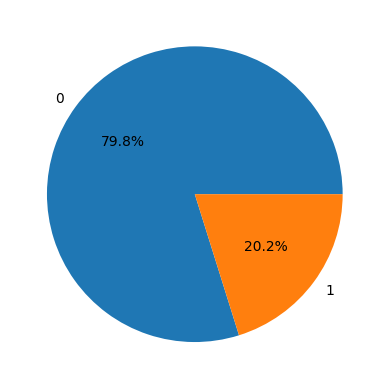

In [5]:
plt.pie(concatenated_df['label'].value_counts(), labels=concatenated_df['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

Check avg word counts in arguments, keypoints, topics

In [6]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

concatenated_df['Word_arg_count'] = concatenated_df['arg'].apply(word_count)
# Calculating the average number of words in the 'arg' column
average_word_arg_count = concatenated_df['Word_arg_count'].mean()
print(f"Average number of words in the 'arg' column: {average_word_arg_count}")

Average number of words in the 'arg' column: 19.566917402521895


In [7]:
concatenated_df['Word_kp_count'] = concatenated_df['key_point'].apply(word_count)
# Calculating the average number of words in the 'arg' column
average_word_kp_count = concatenated_df['Word_kp_count'].mean()
print(f"Average number of words in the 'kp' column: {average_word_kp_count}")

Average number of words in the 'kp' column: 9.142265343944183


Mean token count: 9.142265343944183
Variance in token count: 11.148703800364775
Standard deviation of token count: 3.3389674751882166
Range of token count: 20
Maximum token length: 23
Minimum token length: 3


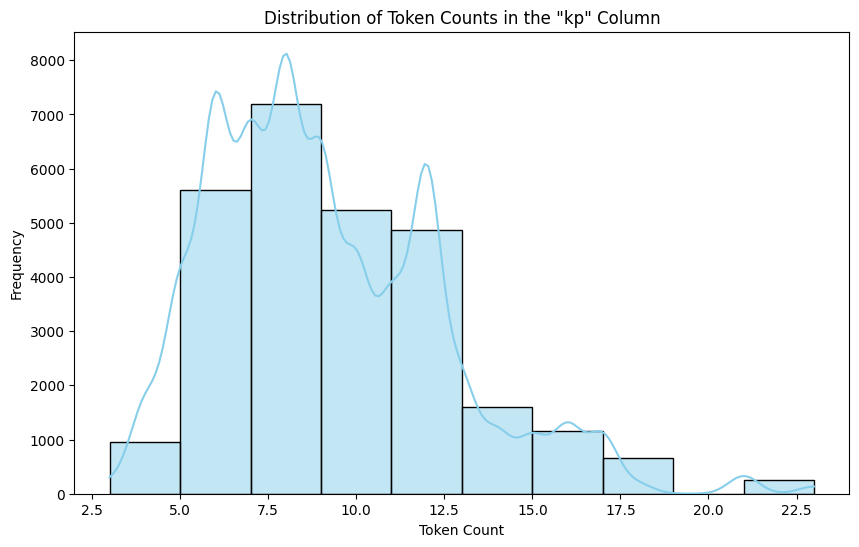

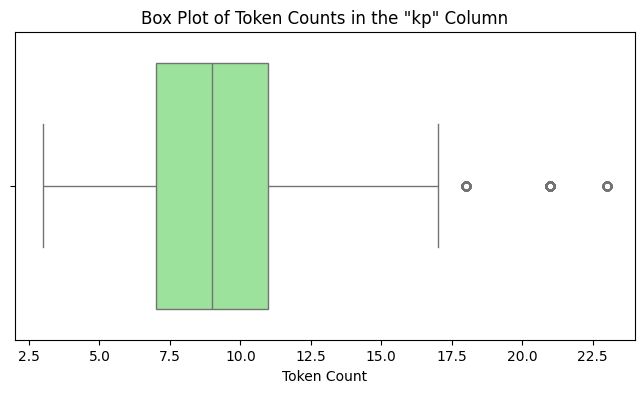

In [10]:
# Calculating token length for each key point
concatenated_df['Token_kp_count'] = concatenated_df['key_point'].apply(lambda x: len(str(x).split()))

# Calculating statistical measures for token lengths
mean_token_count = concatenated_df['Token_kp_count'].mean()
variance_token_count = concatenated_df['Token_kp_count'].var()
std_dev_token_count = concatenated_df['Token_kp_count'].std()
range_token_count = concatenated_df['Token_kp_count'].max() - concatenated_df['Token_kp_count'].min()

print(f"Mean token count: {mean_token_count}")
print(f"Variance in token count: {variance_token_count}")
print(f"Standard deviation of token count: {std_dev_token_count}")
print(f"Range of token count: {range_token_count}")
print(f"Maximum token length: {concatenated_df['Token_kp_count'].max()}")
print(f"Minimum token length: {concatenated_df['Token_kp_count'].min()}")

# Visualizing the distribution of token counts

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(concatenated_df['Token_kp_count'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Token Counts in the "kp" Column')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=concatenated_df['Token_kp_count'], color='lightgreen')
plt.title('Box Plot of Token Counts in the "kp" Column')
plt.xlabel('Token Count')
plt.show()


Mean word count: 19.566917402521895
Variance in word count: 58.92028932347048
Standard deviation of word count: 7.6759552710702055
Range of word count: 45


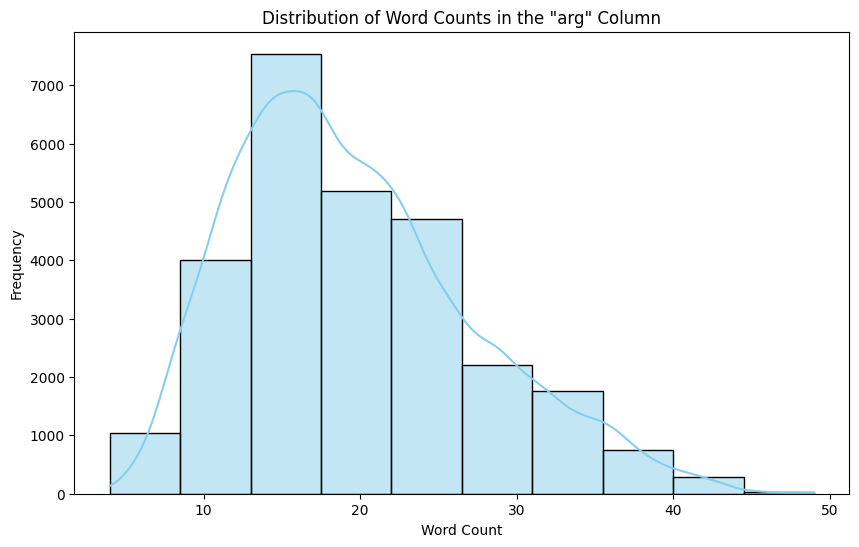

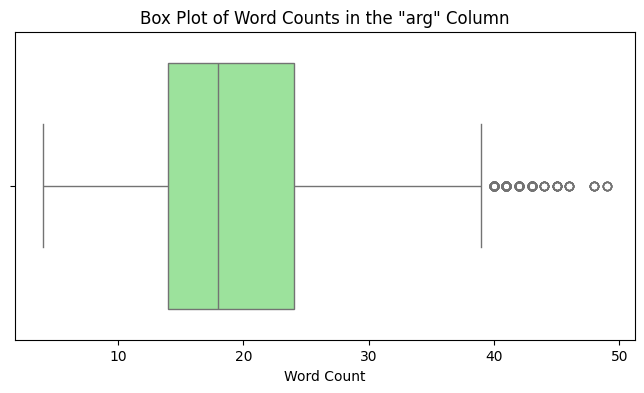

In [9]:
# Calculating statistical measures
mean_word_count = concatenated_df['Word_arg_count'].mean()
variance_word_count = concatenated_df['Word_arg_count'].var()
std_dev_word_count = concatenated_df['Word_arg_count'].std()
range_word_count = concatenated_df['Word_arg_count'].max() - concatenated_df['Word_arg_count'].min()

print(f"Mean word count: {mean_word_count}")
print(f"Variance in word count: {variance_word_count}")
print(f"Standard deviation of word count: {std_dev_word_count}")
print(f"Range of word count: {range_word_count}")

# Visualizing the distribution of word counts

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(concatenated_df['Word_arg_count'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in the "arg" Column')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=concatenated_df['Word_arg_count'], color='lightgreen')
plt.title('Box Plot of Word Counts in the "arg" Column')
plt.xlabel('Word Count')
plt.show()